In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, colors
from pandas.plotting import boxplot

In [ ]:
df2019 = pd.read_csv('data/archive/Combined_Flights_2019.csv')


In [3]:
del df2019['CRSDepTime']
del df2019['CRSArrTime']
del df2019['CRSElapsedTime']
del df2019['Marketing_Airline_Network']
del df2019['Operated_or_Branded_Code_Share_Partners']
del df2019['Flight_Number_Marketing_Airline']
del df2019['Flight_Number_Operating_Airline']
del df2019['Operating_Airline']
del df2019['DOT_ID_Marketing_Airline']
del df2019['DOT_ID_Operating_Airline']
del df2019['IATA_Code_Marketing_Airline']
del df2019['IATA_Code_Operating_Airline']
del df2019['OriginAirportID']
del df2019['OriginAirportSeqID']
del df2019['OriginCityMarketID']
del df2019['OriginStateFips']
del df2019['OriginWac']
del df2019['DestAirportID']
del df2019['DestAirportSeqID']
del df2019['DestCityMarketID']
del df2019['DestStateFips']
del df2019['DestWac']


In [4]:
df2019.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'AirTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings'],
      dtype='object')

In [5]:
df2019

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1209.0,0.0,-3.0,1350.0,...,10.0,1219.0,1342.0,8.0,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1200.0,0.0,-12.0,1348.0,...,10.0,1210.0,1339.0,9.0,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1203.0,0.0,-9.0,1342.0,...,11.0,1214.0,1336.0,6.0,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1435.0,143.0,143.0,1621.0,...,17.0,1452.0,1615.0,6.0,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1216.0,4.0,4.0,1410.0,...,18.0,1234.0,1357.0,13.0,5.0,0.0,0.0,1400-1459,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091679,2019-01-23,ExpressJet Airlines Inc.,MEM,IAH,False,False,634.0,0.0,-6.0,853.0,...,36.0,710.0,847.0,6.0,13.0,0.0,0.0,0800-0859,2,0
8091680,2019-01-24,ExpressJet Airlines Inc.,MEM,IAH,False,False,631.0,0.0,-9.0,830.0,...,26.0,657.0,820.0,10.0,-10.0,0.0,-1.0,0800-0859,2,0
8091681,2019-01-25,ExpressJet Airlines Inc.,MEM,IAH,False,False,632.0,0.0,-8.0,828.0,...,22.0,654.0,822.0,6.0,-12.0,0.0,-1.0,0800-0859,2,0
8091682,2019-01-26,ExpressJet Airlines Inc.,MEM,IAH,False,False,630.0,0.0,-10.0,831.0,...,26.0,656.0,825.0,6.0,-9.0,0.0,-1.0,0800-0859,2,0


Text(0, 0.5, 'Atraso Médio (Minutos)')

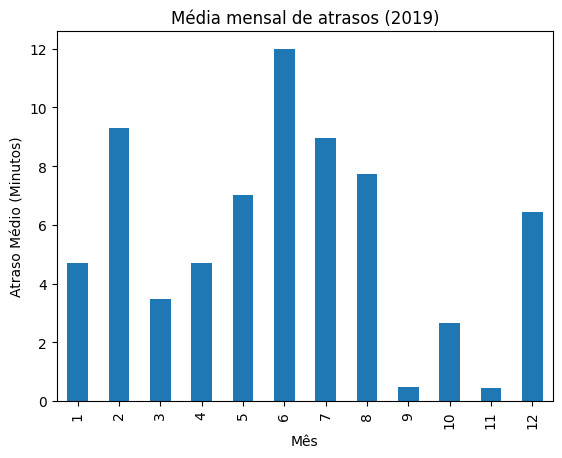

In [6]:
df2019.groupby('Month')['ArrDelay'].mean().plot.bar()
plt.title('Média mensal de atrasos (2019)')
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (Minutos)')

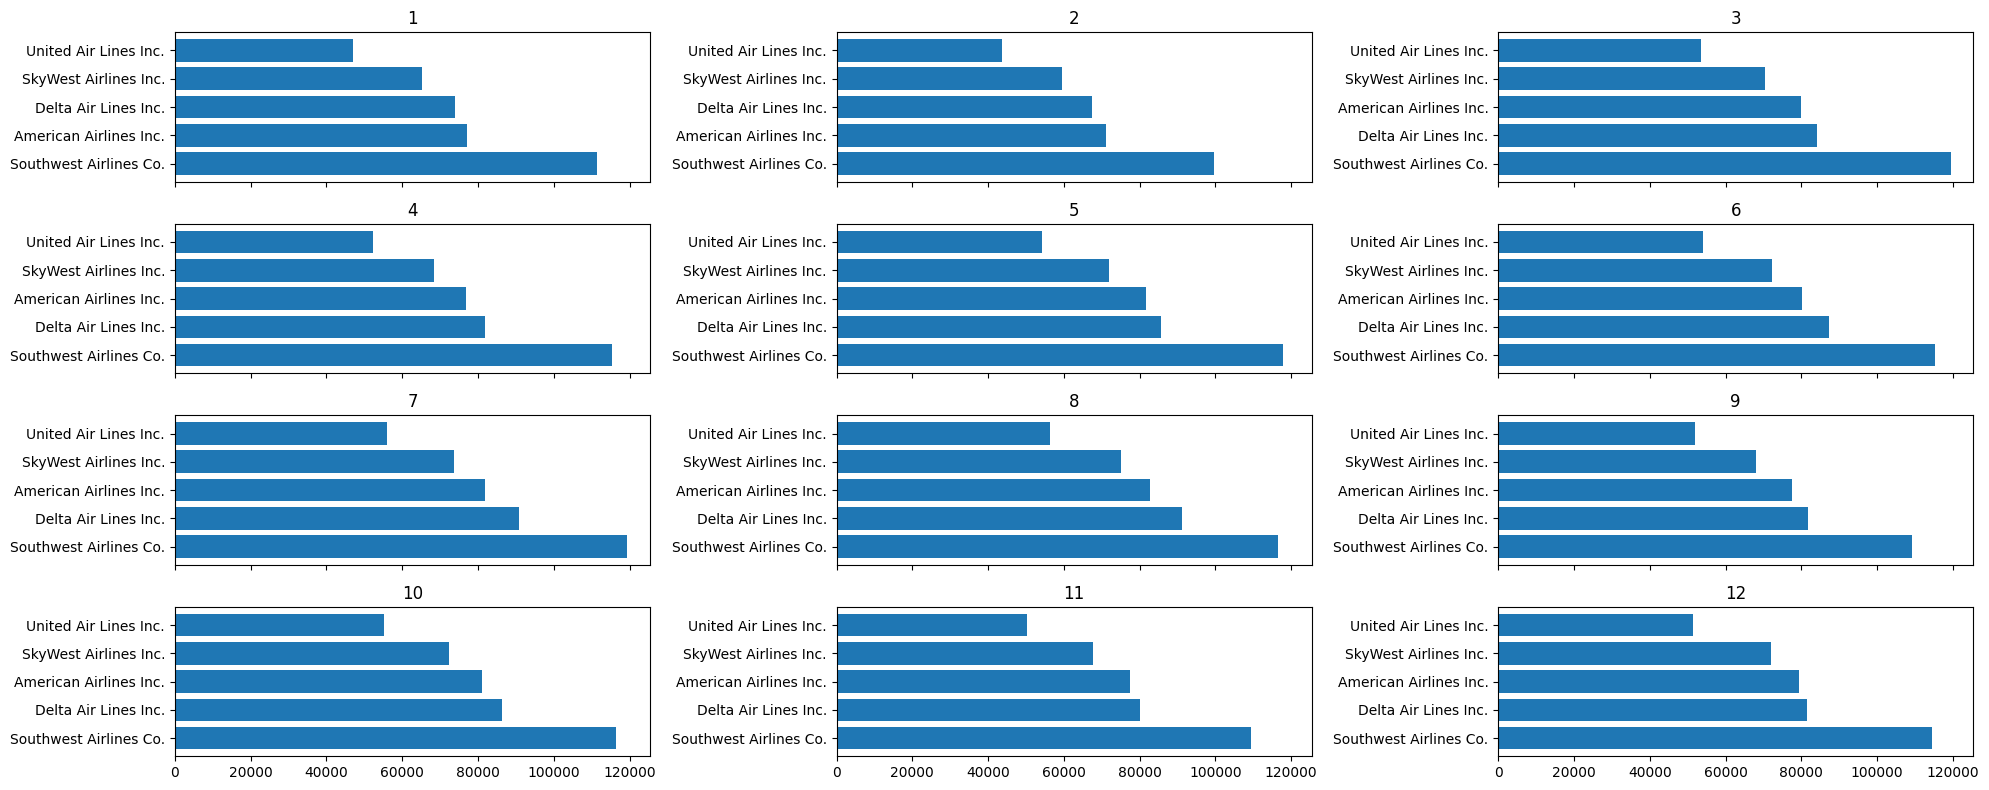

In [7]:
df = df2019.groupby(['Airline', 'Month']).size().reset_index()
df.rename(columns={0: 'Count'}, inplace=True)
# df[df.Month == 12].sort_values(by=['Month'], ascending=False).head(5)

fig, axs = plt.subplots(4, 3, sharex=True, figsize=(20, 8))

for i in range(0,12):
    axs[i//3, i%3].set_title(i+1)
    dfMonth = df[df.Month == i+1].sort_values(by=['Count'], ascending=False).head(5)
    axs[i//3, i%3].barh(dfMonth.Airline, dfMonth.Count)

fig.tight_layout()

del df

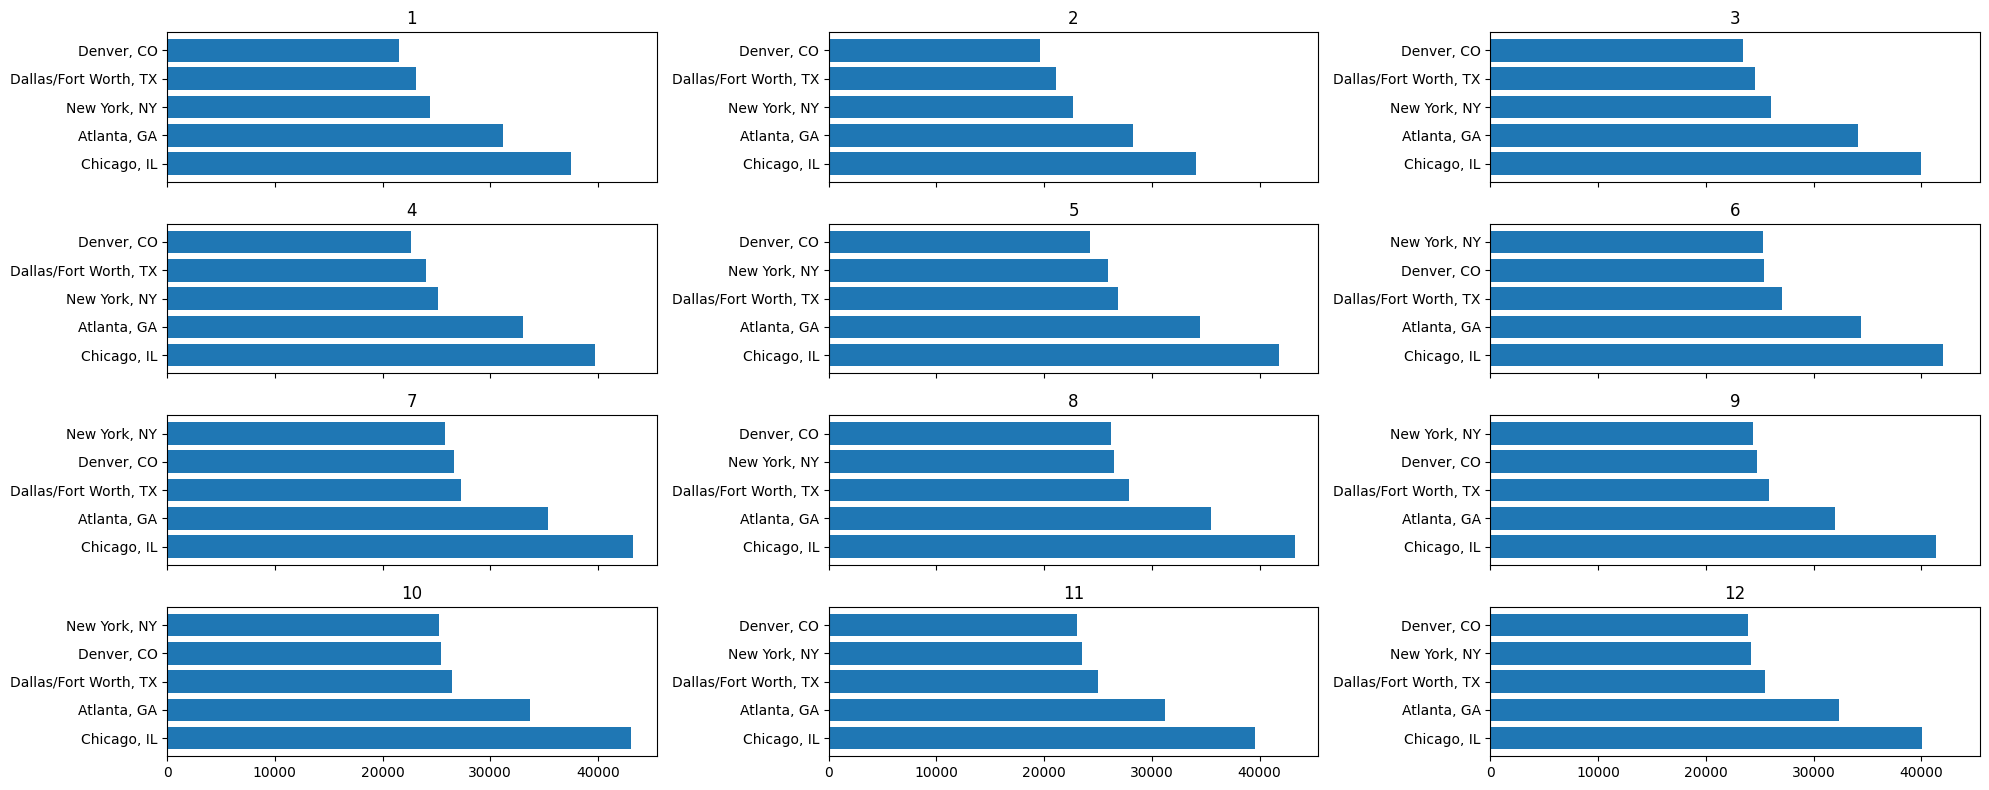

In [8]:
df = df2019.groupby(['DestCityName', 'Month']).size().reset_index()
df.rename(columns={0: 'Count'}, inplace=True)
# df[df.Month == 12].sort_values(by=['Month'], ascending=False).head(5)

fig, axs = plt.subplots(4, 3, sharex=True, figsize=(20, 8))

for i in range(0,12):
    axs[i//3, i%3].set_title(i+1)
    dfMonth = df[df.Month == i+1].sort_values(by=['Count'], ascending=False).head(5)
    axs[i//3, i%3].barh(dfMonth.DestCityName, dfMonth.Count)

fig.tight_layout()
del df

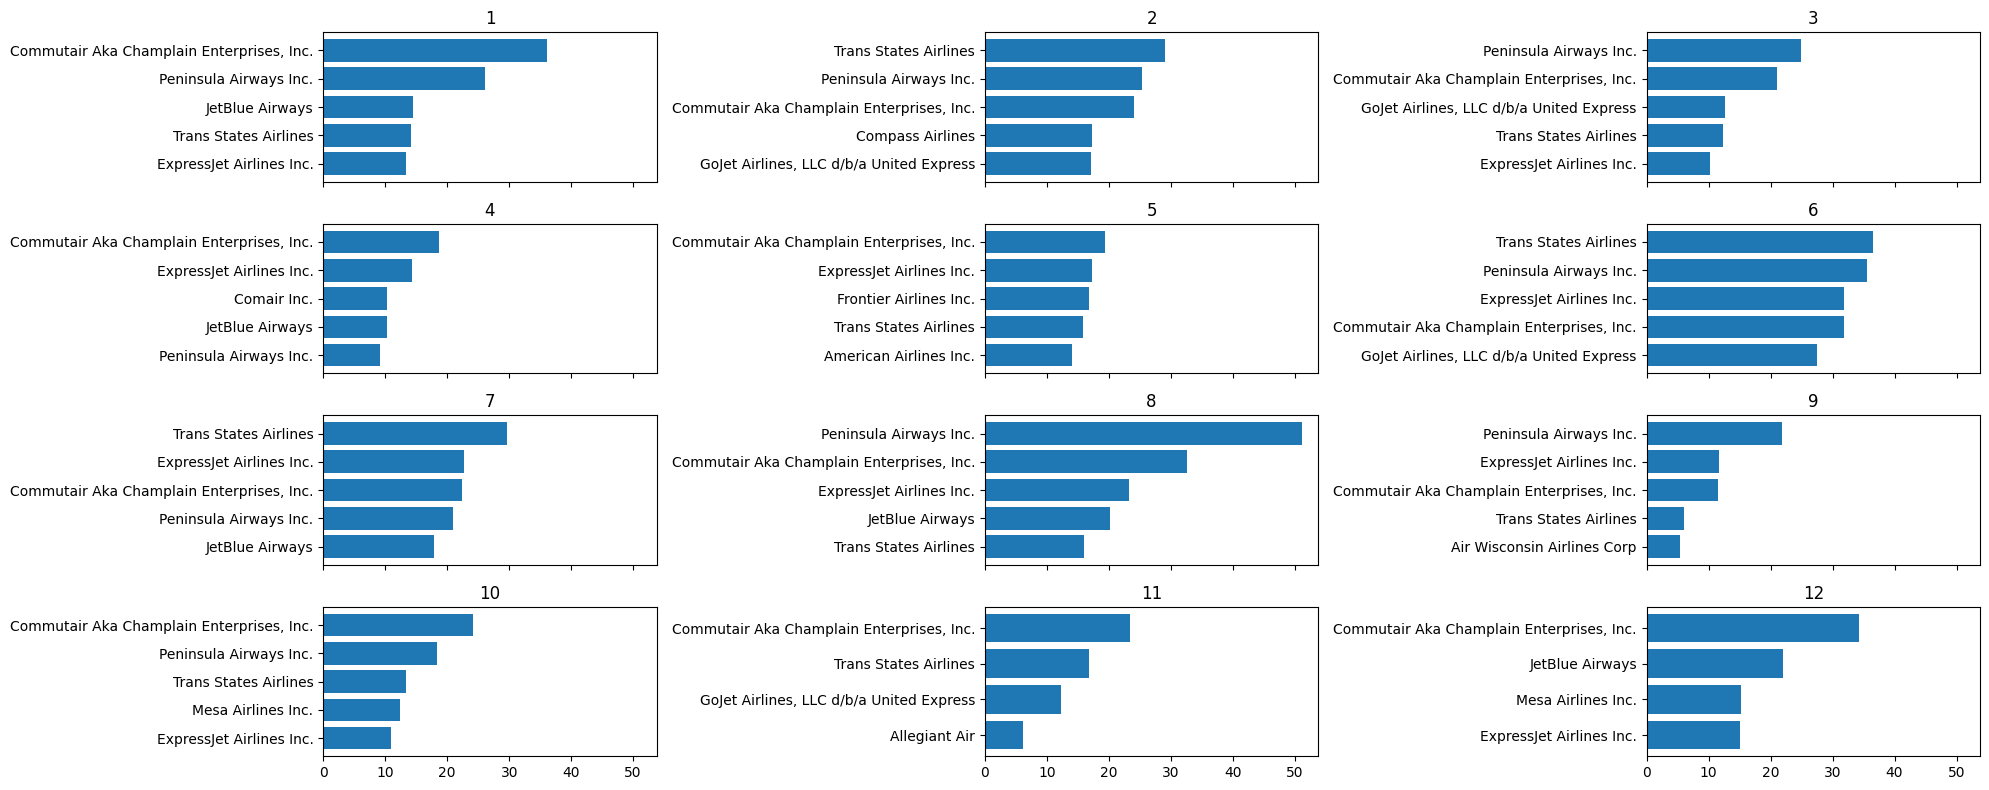

In [9]:
df = df2019.groupby(['Airline', 'Month'])['ArrDelay'].mean().sort_values().unstack()
# df.sort_values(1).tail(10)[1]
fig, axs = plt.subplots(4, 3, sharex=True, figsize=(20, 8))

for i in range(0,12):
    axs[i//3, i%3].set_title(i+1)
    dfMonth = df.sort_values(by=i+1).tail(5)
    axs[i//3, i%3].barh(dfMonth.index, dfMonth[i+1])

fig.tight_layout()

del df

In [112]:
voos_por_companhia = df2019['Airline'].value_counts().reset_index().rename(columns={'count': 'TotalVoos'}).sort_values('TotalVoos')
top_companhias = voos_por_companhia.tail(5).Airline

voos_por_cidade = df2019['DestCityName'].value_counts().reset_index().rename(columns={'count': 'TotalVoos'}).sort_values('TotalVoos')
top_cities = voos_por_cidade.tail(10).DestCityName

flights_top = df2019[df2019['Airline'].isin(top_companhias)][df2019['DestCityName'].isin(top_cities)]

/tmp/ipykernel_25320/117495293.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flights_top = df2019[df2019['Airline'].isin(top_companhias)][df2019['DestCityName'].isin(top_cities)]


In [103]:
voos_por_companhia

,Airline,TotalVoos
25,Peninsula Airways Inc.,1474
24,Empire Airlines Inc.,8833
23,"Commutair Aka Champlain Enterprises, Inc.",58052
22,Trans States Airlines,76000
21,"GoJet Airlines, LLC d/b/a United Express",79063
20,Hawaiian Airlines Inc.,83891
19,Compass Airlines,94209
18,Allegiant Air,105305
17,Air Wisconsin Airlines Corp,106894
16,Horizon Air,121897


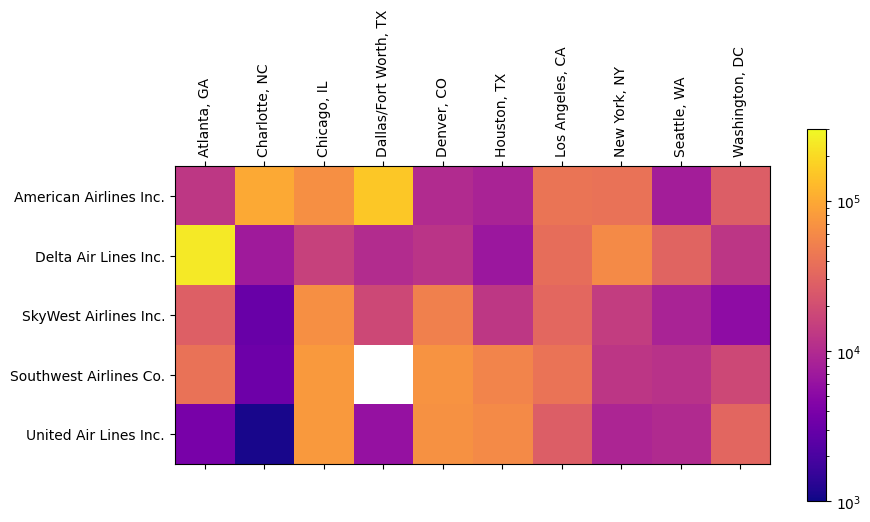

In [120]:
city_corrs = flights_top.groupby(['Airline', 'DestCityName']).size().unstack()

img = plt.matshow(city_corrs, norm=colors.LogNorm(vmin=1000, vmax=300_000), cmap=plt.cm.plasma)
plt.xticks(range(len(city_corrs.columns)), labels=list(city_corrs.columns), rotation=90)
plt.yticks(range(len(city_corrs.index)), labels=list(city_corrs.index))
plt.colorbar(mappable=img)
del city_corrs

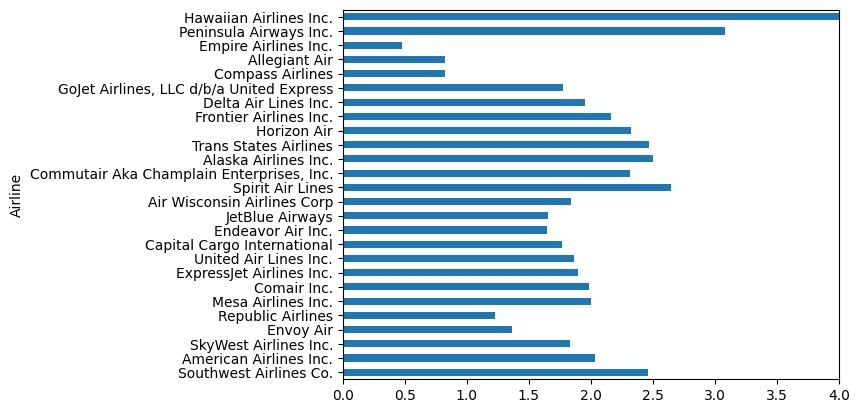

In [137]:
cancel_counts = (df2019[df2019['Cancelled'] == True]['Airline']
                 .value_counts()
                 .reset_index()
                 .rename(columns={'count': 'VoosCancelados'}))
cancel_counts['Cancelamentos a cada 100 voos'] = cancel_counts['VoosCancelados'] / voos_por_companhia['TotalVoos'] *100
cancel_counts.plot.barh(x='Airline', y='Cancelamentos a cada 100 voos', legend=False)
plt.xlim(0,4)
del cancel_counts

ValueError: x and y must have the same length.

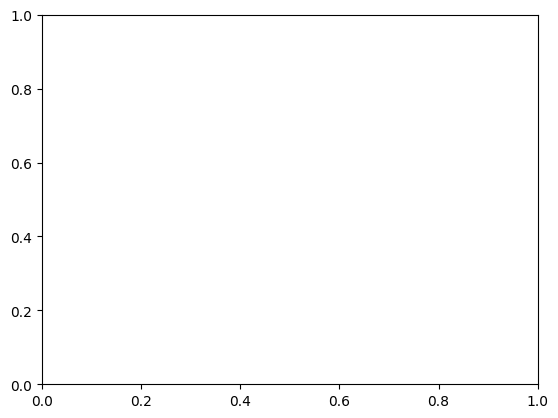

In [174]:
# delayed = df2019.dropna(subset=['ArrDelay'])
# plt.hist2d(delayed['Distance'], delayed['ArrDelay'])
# del delayed